<h2> Sentiment Analysis Model </h2>

<h3> Importing the Packages </h3>

In [25]:
import pandas as pd
import numpy as np
from langdetect import detect
from langdetect import lang_detect_exception
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
from tabulate import tabulate
from prettytable import PrettyTable

<h3>Importing Datasets</h3>

In [2]:
#This cell reads the two CSV source files and stores them in DataFrames named Tweet_Train and Tweet_Test.
Tweet_Train = pd.DataFrame(pd.read_csv('twitter_training.csv'))
Tweet_Test = pd.DataFrame(pd.read_csv('twitter_validation.csv'))

<h3> Data Cleaning</h3>

In [3]:
#To rename the columns of the Tweet_Train and Tweet_Test DataFrames. 
headers=['Tweet ID', 'Entity', 'Sentiment', 'Content']
Tweet_Train.columns = headers
Tweet_Test.columns = headers

In [7]:
Tweet_Train.shape

(74681, 4)

In [8]:
Tweet_Test.shape

(999, 4)

In [4]:
#To remove duplicate values
Tweet_Train[Tweet_Train.duplicated(subset=['Content'], keep=False)]
Tweet_Train_Clean= Tweet_Train.drop_duplicates(subset=['Content'], keep='first')
#To remove missing values
Tweet_Train_Clean=Tweet_Train_Clean.dropna()
#To get the number of rows and columns in the clean dataset
Tweet_Train_Clean.shape

(69490, 4)

In [5]:
#To remove duplicate values
Tweet_Test[Tweet_Test.duplicated(subset=['Content'], keep=False)]
Tweet_Test_Clean= Tweet_Test.drop_duplicates(subset=['Content'], keep='first')
#To remove missing values
Tweet_Test_Clean=Tweet_Test_Clean.dropna()
#To get the number of rows and columns in the clean dataset
Tweet_Test_Clean.shape

(998, 4)

<h3> Data Transformation </h3>

In [10]:
# To create a function to detect the language of a tweet and map to full language names
def detect_language(tweet):
    try:
        lang_code = detect(tweet)
        # Create a dictionary to map language abbreviations to full names
        language_mapping = {
            "af": "Afrikaans",
            "bg": "Bulgarian",
            "ca": "Catalan",
            "cs": "Czech",
            "cy": "Welsh",
            "da": "Danish",
            "de": "German",
            "en": "English",
            "es": "Spanish",
            "et": "Estonian",
            "fi": "Finnish",
            "fr": "French",
            "hr": "Croatian",
            "hu": "Hungarian",
            "id": "Indonesian",
            "it": "Italian",
            "lt": "Lithuanian",
            "lv": "Latvian",
            "mk": "Macedonian",
            "nl": "Dutch",
            "no": "Norwegian",
            "pl": "Polish",
            "pt": "Portuguese",
            "ro": "Romanian",
            "ru": "Russian",
            "sk": "Slovak",
            "sl": "Slovenian",
            "so": "Somali",
            "sq": "Albanian",
            "sv": "Swedish",
            "sw": "Swahili",
            "th": "Thai",
            "tl": "Tagalog",
            "tr": "Turkish",
            "uk": "Ukrainian",
            "vi": "Vietnamese"
        }
        return language_mapping.get(lang_code, "Unknown")
    except lang_detect_exception.LangDetectException:
        return "Unknown"

# Apply the function to each tweet in the "Content" column and create a new "Language" column
Tweet_Train_Clean["Language"] = Tweet_Train_Clean["Content"].apply(detect_language)

# Apply the function to each tweet in the "Content" column and create a new "Language" column
Tweet_Test_Clean["Language"] = Tweet_Test_Clean["Content"].apply(detect_language)

<h3> Data Model </h3>


Validation Set Metrics:
+-----------+-------+
| Metric    | Value |
+-----------+-------+
| Accuracy  |  0.73 |
| Precision |  0.77 |
| Recall    |  0.73 |
| F1 Score  |  0.72 |
+-----------+-------+

Test Set Metrics:
+-----------+-------+
| Metric    | Value |
+-----------+-------+
| Accuracy  |  0.77 |
| Precision |  0.81 |
| Recall    |  0.77 |
| F1 Score  |  0.77 |
+-----------+-------+


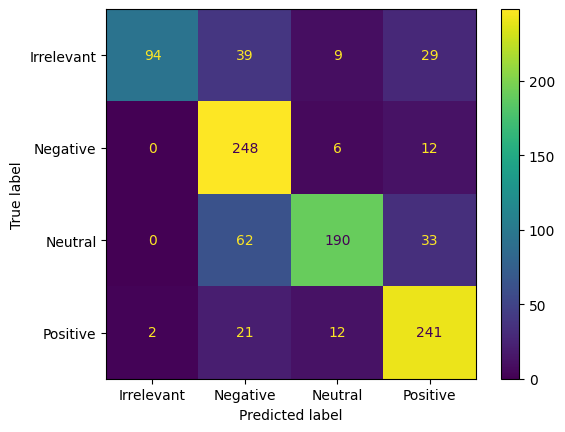

In [26]:
# Load the training and testing data
train_data = Tweet_Train_Clean
test_data = Tweet_Test_Clean

# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train = tfidf_vectorizer.fit_transform(train_data["Content"])

# Transform the testing data using the same vectorizer
X_test = tfidf_vectorizer.transform(test_data["Content"])

# Define the target variable
y_train = train_data["Sentiment"]
y_test = test_data["Sentiment"]

# Split the training data into training and validation sets (you can adjust the test_size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a classification model (Naive Bayes is used in this example)
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict sentiment on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Predict sentiment on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Predict sentiment on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

# Predict sentiment on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Create PrettyTable objects for validation and test set metrics
validation_metrics_table = PrettyTable()
validation_metrics_table.field_names = ["Metric", "Value"]
validation_metrics_table.add_row(["Accuracy", f"{accuracy_val:.2f}"])
validation_metrics_table.add_row(["Precision", f"{precision_val:.2f}"])
validation_metrics_table.add_row(["Recall", f"{recall_val:.2f}"])
validation_metrics_table.add_row(["F1 Score", f"{f1_val:.2f}"])

test_metrics_table = PrettyTable()
test_metrics_table.field_names = ["Metric", "Value"]
test_metrics_table.add_row(["Accuracy", f"{accuracy_test:.2f}"])
test_metrics_table.add_row(["Precision", f"{precision_test:.2f}"])
test_metrics_table.add_row(["Recall", f"{recall_test:.2f}"])
test_metrics_table.add_row(["F1 Score", f"{f1_test:.2f}"])

# Define table formatting
def format_table(table):
    table.align["Metric"] = "l"
    table.align["Value"] = "c"

# Apply formatting to the tables
format_table(validation_metrics_table)
format_table(test_metrics_table)

# Display the tables with specified formatting
print("\nValidation Set Metrics:")
print(validation_metrics_table)
print("\nTest Set Metrics:")
print(test_metrics_table)

# Create and display the confusion matrix for the test set using the provided function
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of the confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

# Display the confusion matrix for the test set
conf_matrix_plot(model, X_test, y_test)
